뱁새와 오목눈이 분류 신경망 구현

In [1]:
import cv2
import os 
import numpy as np

In [2]:
path = "/content/drive/MyDrive/data/cnn/train"    # 원본위치
file_list = os.listdir(path) 

for k in file_list:     # 리스트안에 있는 파일들을 하나씩 빼내는 코드 
    img = cv2.imread(path + '/' + k) #  이미지 데이터를 행렬로 숫자로 변환합니다. 
    resize_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)  
    cv2.imwrite('/content/drive/MyDrive/data/cnn/train_resize/' + k, resize_img)   

In [10]:
path='/content/drive/MyDrive/data/cnn/train_label.csv'
file = open(path, 'w')

# label (뱁새 0, 오목눈이 1)
for i in range(1, 201):
    file.write(str(0)+'\n')

for i in range(201, len(file_list)+1):
    file.write(str(1)+'\n')

file.close()

In [11]:
train_images='/content/drive/MyDrive/data/cnn/train_resize'

import re

def image_load(path):
    #1. 사진  파일명에서 숫자부분만 취합니다.
    file_list  = os.listdir(path)   # path 디렉토리에 파일명들을 불러옵니다.
    file_name = []
    for i in file_list:
        name = int(re.sub('[^0-9]', '',  i ))  #  i 가 숫자가 아니라면 null 로 변경해라
        file_name.append(name)
    file_name.sort()
 
    #2. 디렉토리와 숫자 파일명을 이어 붙입니다.
    file_res = [ ]
    for j in file_name:    
        file_res.append(path + '/' + str(j) + '.jpg')   # 전체 경로 + 파일명을 생성

    #3. 위에서만든 디렉토리와 파일명을 가지고 사진을 숫자로 변경합니다.
    image= [ ]
    for k in file_res:
        img = cv2.imread(k)   # 이미지를 숫자로 변경합니다.
        image.append(img)

    return np.array(image)

print(image_load(train_images))

[[[[140 167 123]
   [140 164 122]
   [139 158 125]
   ...
   [ 80 130 100]
   [ 74 118  95]
   [ 95 135 117]]

  [[134 162 119]
   [128 155 115]
   [134 156 121]
   ...
   [ 90 140 110]
   [ 83 125 102]
   [ 99 135 118]]

  [[ 96 129  92]
   [122 156 116]
   [115 146 107]
   ...
   [ 83 132 104]
   [104 140 118]
   [143 171 152]]

  ...

  [[103 130 151]
   [187 216 237]
   [156 188 211]
   ...
   [103 141 105]
   [ 64  93  67]
   [147 173 150]]

  [[171 212 237]
   [157 199 222]
   [102 143 166]
   ...
   [ 72 110  88]
   [ 35  65  52]
   [139 166 157]]

  [[108 157 183]
   [ 33  81 105]
   [  0  37  60]
   ...
   [ 30  66  52]
   [ 36  68  63]
   [140 168 168]]]


 [[[194 188 213]
   [192 195 216]
   [ 77  93 109]
   ...
   [ 41  78  68]
   [ 53  80  70]
   [  6  30  18]]

  [[163 161 183]
   [205 209 228]
   [100 116 133]
   ...
   [ 49  87  75]
   [ 52  80  67]
   [ 10  36  22]]

  [[121 128 143]
   [193 201 218]
   [115 126 148]
   ...
   [ 52  89  73]
   [ 62  94  77]
   [ 58  88

In [19]:
from tensorflow.keras.utils import to_categorical
import csv
import numpy as np

train_label = '/content/drive/MyDrive/data/cnn/train_label.csv'

def label_load(path):
    file = open(path)
    label_data = csv.reader(file)
    label_list = []
    for i in label_data:
        label_list.append(i)
    return label_list

print (label_load(train_label))

[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']

In [20]:
import tensorflow as tf   # 텐써 플로우 2.0
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten ,BatchNormalization,Dropout # CNN, 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical # one encoding 하는 모듈

tf.random.set_seed(777)

# 새 이미지 
train_images = '/content/drive/MyDrive/data/cnn/train_resize'
train_label = '/content/drive/MyDrive/data/cnn/train_label.csv'

x_train = image_load(train_images)
y_train = label_load(train_label)

# 2. 정규화
x_train = x_train / 255.0
print(x_train.shape)

# one hot encoding
y_train = to_categorical(y_train)

(407, 32, 32, 3)


In [21]:
# 3. 3층 CNN 모델
model = Sequential()
model.add(Conv2D(100, kernel_size=(5,5), input_shape=(32,32,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same')) 
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten()) 
model.add(Dense(50, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(50, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation = 'softmax'))

In [22]:
# 5. 모델 설정
model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics=['acc']) 

#6. 모델 훈련
history = model.fit(x_train, y_train,
                    epochs = 200,
                    batch_size = 10)

Epoch 1/200
41/41 [==============================] - 4s 46ms/step - loss: 0.8623 - acc: 0.6143
Epoch 2/200
41/41 [==============================] - 2s 45ms/step - loss: 0.5982 - acc: 0.7346
Epoch 3/200
41/41 [==============================] - 2s 45ms/step - loss: 0.5481 - acc: 0.7518
Epoch 4/200
41/41 [==============================] - 2s 58ms/step - loss: 0.3963 - acc: 0.8182
Epoch 5/200
41/41 [==============================] - 3s 79ms/step - loss: 0.4284 - acc: 0.7936
Epoch 6/200
41/41 [==============================] - 2s 46ms/step - loss: 0.3633 - acc: 0.8477
Epoch 7/200
41/41 [==============================] - 2s 45ms/step - loss: 0.3039 - acc: 0.8550
Epoch 8/200
41/41 [==============================] - 2s 45ms/step - loss: 0.3242 - acc: 0.8600
Epoch 9/200
41/41 [==============================] - 2s 45ms/step - loss: 0.3014 - acc: 0.8722
Epoch 10/200
41/41 [==============================] - 2s 45ms/step - loss: 0.3014 - acc: 0.8845
Epoch 11/200
41/41 [=============================

In [23]:
# 7.모델 평가
#model.evaluate(x_test, y_test)
model.save('/content/drive/MyDrive/data/cnn/model.h5')

In [26]:
path = '/content/drive/MyDrive/data/cnn/test'
file_list = os.listdir(path) 

for k in file_list:
    img = cv2.imread(path + '/' + k)
    resize_img = cv2.resize(img, (32 , 32), interpolation=cv2.INTER_CUBIC)  
    cv2.imwrite('/content/drive/MyDrive/data/cnn/test_resize/' + k, resize_img)   

In [27]:
test_images = '/content/drive/MyDrive/data/cnn/test_resize'

x_test = image_load(test_images)
x_test = x_test / 255

random = np.random.randint(len(x_test))
img = x_test[random].reshape(-1, 32, 32, 3)

predict = model.predict(img)
np.argmax(predict)

1/1 [==============================] - 0s 407ms/step


0

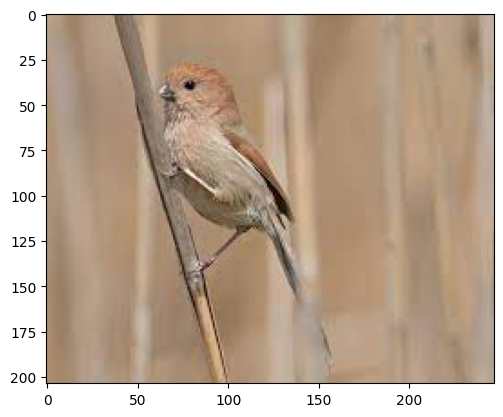

In [28]:
# visualization
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/data/cnn/test/' + str(random+1) + '.jpg')
img_pixel = np.array(img)

plt.imshow(img_pixel)